# Immune diversity

In [5]:
import pandas as pd
df_imrep_RNASeq = pd.read_csv('imrep.RNASeq.csv')

metadata=pd.read_csv('../outcomes/PILOT.RNASeq.clean.metadata.csv')
data_imrep_RNASeq=pd.merge(df_imrep_RNASeq, metadata, on='ID')
depth_RNASeq=pd.read_csv('../bams/NR.RNASeq.csv')
data_RNASeq_cov=pd.merge(data_imrep_RNASeq, depth_RNASeq, on='ID')
data_imrep_RNASeq2 = data_imrep_RNASeq[['patientBarcode', 'nIGH2','nTCRA2', 'loadTCRA2','alphaTCRA2','loadIGH2','alphaIGH2','disease']].copy()
#data_imrep_RNASeq['nIGH2.norm']=(data_imrep_RNASeq['nIGH2']/data_imrep_RNASeq['NR'])*1000000
data_imrep_RNASeq2.head()



,patientBarcode,nIGH2,nTCRA2,loadTCRA2,alphaTCRA2,loadIGH2,alphaIGH2,disease
0,TCGA-BF-A5EP,0,8,26,1.944819,0,0.000000,SKCM
1,TCGA-HC-7210,31,98,322,4.221790,134,2.979456,PRAD
2,TCGA-E2-A9RU,2,11,24,2.383540,5,0.673012,BRCA
3,TCGA-HC-7817,10,43,188,3.009883,51,1.985041,PRAD
4,TCGA-E2-A1B4,25,412,3693,3.651290,177,3.017662,BRCA


In [17]:
import pandas as pd
df_imrep_WXS = pd.read_csv('imrep.WXS.csv')
metadata=pd.read_csv('../outcomes/PILOT.WXS.clean.metadata.csv')
data_imrep_WXS=pd.merge(df_imrep_WXS, metadata, on='ID')
df = pd.read_csv('offtarget.WXS.csv')
data_imrep_WXS=pd.merge(data_imrep_WXS, df, on='ID')

data_imrep_WXS['nIGH_norm'] = data_imrep_WXS['nIGH']/data_imrep_WXS['cov']
data_imrep_WXS['nTCRA_norm'] = data_imrep_WXS['nTCRA']/data_imrep_WXS['cov']

data_imrep_WXS2 = data_imrep_WXS[['patientBarcode', 'nIGH_norm', 'nTCRA_norm', 'nIGH','nTCRA', 'loadTCRA','alphaTCRA','loadIGH','alphaIGH']].copy()


data_imrep_WXS2.head()

,patientBarcode,nIGH_norm,nTCRA_norm,nIGH,nTCRA,loadTCRA,alphaTCRA,loadIGH,alphaIGH
0,TCGA-A2-A4S1,0.0,0.556498,0,3,57,0.609508,0,0.0
1,TCGA-BH-A1EY,0.0,4.429647,0,22,96,2.450031,0,0.0
2,TCGA-A7-A13G,0.0,24.034023,0,76,226,3.975466,0,0.0
3,TCGA-C8-A1HK,0.0,4.697186,0,22,94,2.607778,0,0.0
4,TCGA-A2-A25D,0.0,4.210087,0,14,69,2.231937,0,0.0


In [18]:
data_imrep_both=pd.merge(data_imrep_WXS2, data_imrep_RNASeq2, on='patientBarcode')
data_imrep_both.head()

,patientBarcode,nIGH_norm,nTCRA_norm,nIGH,nTCRA,loadTCRA,alphaTCRA,loadIGH,alphaIGH,nIGH2,nTCRA2,loadTCRA2,alphaTCRA2,loadIGH2,alphaIGH2,disease
0,TCGA-BH-A1EY,0.00000,4.429647,0,22,96,2.450031,0,0.0,38,298,1411,4.274307,515,2.902973,BRCA
1,TCGA-A7-A6VW,0.00000,1.592631,0,6,48,1.062749,0,0.0,7,39,142,3.509253,22,1.870818,BRCA
2,TCGA-EW-A1J2,0.19395,6.012452,1,31,137,2.735603,2,-0.0,224,630,3029,5.023546,2311,4.516267,BRCA
3,TCGA-E9-A22G,0.00000,5.855541,0,19,103,2.025622,0,0.0,22,590,2710,4.644309,135,2.782239,BRCA
4,TCGA-OL-A6VR,0.00000,1.506134,0,9,166,0.834399,0,0.0,17,44,235,2.721254,103,2.615033,BRCA


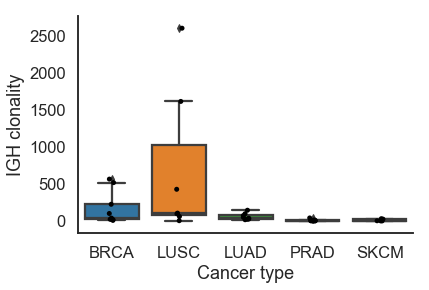

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.boxplot(x="disease", y="nIGH2", data=data_imrep_both)
g=sns.stripplot(x="disease", y="nIGH2", data=data_imrep_both, palette=["black"], jitter=0.05)
g.set(xlabel='Cancer type', ylabel='IGH clonality')
g=sns.despine()
#plt.show(g)
plt.savefig("IGH.clonality.RNASeq.pdf", bbox_inches='tight')

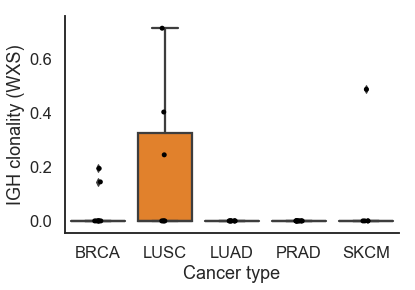

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.boxplot(x="disease", y="nIGH_norm", data=data_imrep_both)
g=sns.stripplot(x="disease", y="nIGH_norm", data=data_imrep_both, palette=["black"], jitter=0.05)
g.set(xlabel='Cancer type', ylabel='IGH clonality (WXS)')
g=sns.despine()
#plt.show(g)
plt.savefig("IGH.clonality.RNASeq.pdf", bbox_inches='tight')

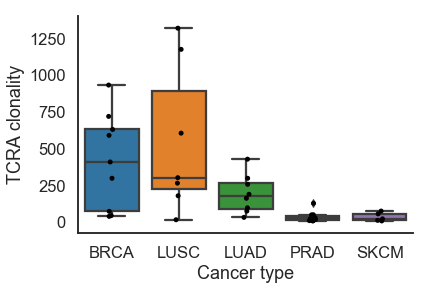

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.boxplot(x="disease", y="nTCRA2", data=data_imrep_both)
g=sns.stripplot(x="disease", y="nTCRA2", data=data_imrep_both, palette=["black"], jitter=0.05)
g.set(xlabel='Cancer type', ylabel='TCRA clonality')
g=sns.despine()
#plt.show(g)
plt.savefig("IGH.clonality.RNASeq.pdf", bbox_inches='tight')

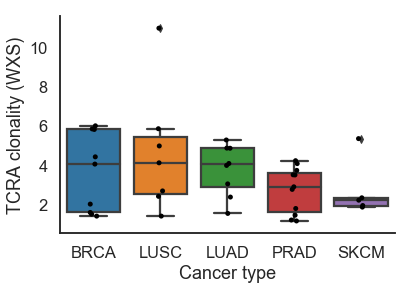

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.boxplot(x="disease", y="nTCRA_norm", data=data_imrep_both)
g=sns.stripplot(x="disease", y="nTCRA_norm", data=data_imrep_both, palette=["black"], jitter=0.05)
g.set(xlabel='Cancer type', ylabel='TCRA clonality (WXS)')
g=sns.despine()
#plt.show(g)
plt.savefig("IGH.clonality.RNASeq.pdf", bbox_inches='tight')

(0.5503657433601429, 0.0002338139338772098)
SpearmanrResult(correlation=1.0, pvalue=0.0)


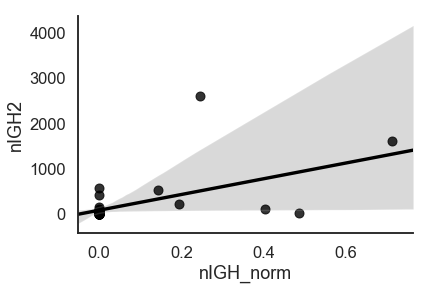

In [26]:

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.regplot(x="nIGH_norm", y="nIGH2", data=data_imrep_both,color="black")
g.set(xlabel='nIGH_norm', ylabel='nIGH2')
g=sns.despine()
#plt.show(g)
plt.savefig("MT.cov.WXS.vs.RNASeq.pdf", bbox_inches='tight')

print stats.pearsonr(data_imrep_both['nIGH_norm'], data_imrep_both['nIGH2'])
print stats.spearmanr(data_imrep_both['nIGH_norm'], data_imrep_both['nIGH_norm'])

(0.6718434976718981, 2.0692829687065825e-06)
SpearmanrResult(correlation=0.5087974750095988, pvalue=0.0008008767832121462)


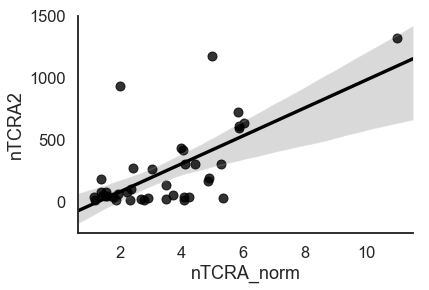

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.regplot(x="nTCRA_norm", y="nTCRA2", data=data_imrep_both,color="black")
g.set(xlabel='nTCRA_norm', ylabel='nTCRA2')
g=sns.despine()
#plt.show(g)
plt.savefig("MT.cov.WXS.vs.RNASeq.pdf", bbox_inches='tight')

print stats.pearsonr(data_imrep_both['nTCRA_norm'], data_imrep_both['nTCRA2'])
print stats.spearmanr(data_imrep_both['nTCRA_norm'], data_imrep_both['nTCRA2'])